In [32]:
import numpy as np, matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.special import comb as C

In [25]:
culling_factor = od()
for name in ["./datasets/1DIsing_N400_R65536_run0X.txt"]:#["./datasets/xorworv2_L40_R524288_run0X.txt"]:
    with open(name) as f:
        for line in f:
            E, c = map(float, line.split())
            culling_factor[E] = c

In [26]:
name = "./datasets/xorworv2_L40_R524288_run0X.txt"
L = int(name.split("_L")[1].split("_R")[0])
R = int(name.split("_R")[1].split("_run")[0])
L, R

(40, 524288)

In [27]:
def get_entropy_from_culling_factor(c):
    S = od({1: 0})
    for E in range(0, -len(c) + 1, -1):
        S[E] = S[E + 1] + np.log(1 - c[E + 1])
    for E in range(0, -len(c) + 1, -1):
        S[E] += np.log(c[E])
    return S
S = get_entropy_from_culling_factor(culling_factor) 
S

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


OrderedDict([(1, 0),
             (0, -inf),
             (-1, -inf),
             (-2, -inf),
             (-3, -inf),
             (-4, -inf),
             (-5, -inf),
             (-6, -inf),
             (-7, -inf),
             (-8, -inf),
             (-9, -inf),
             (-10, -inf),
             (-11, -inf),
             (-12, -inf),
             (-13, -inf),
             (-14, -inf),
             (-15, -inf),
             (-16, -inf),
             (-17, -inf),
             (-18, -inf),
             (-19, -inf),
             (-20, -inf),
             (-21, -inf),
             (-22, -inf),
             (-23, -inf),
             (-24, -inf),
             (-25, -inf),
             (-26, -inf),
             (-27, -inf),
             (-28, -inf),
             (-29, -inf),
             (-30, -inf),
             (-31, -inf),
             (-32, -inf),
             (-33, -inf),
             (-34, -inf),
             (-35, -inf),
             (-36, -inf),
             (-37, -inf),
  

In [28]:
#for given betta
def calc_rho(beta, entropy):
    Z = 0
    rho = od()
    for E, S in entropy.items():
        rho[E] = np.exp(- beta * E + S)
        Z += rho[E]
    for E in rho:
        rho[E] /= Z
    return rho, Z

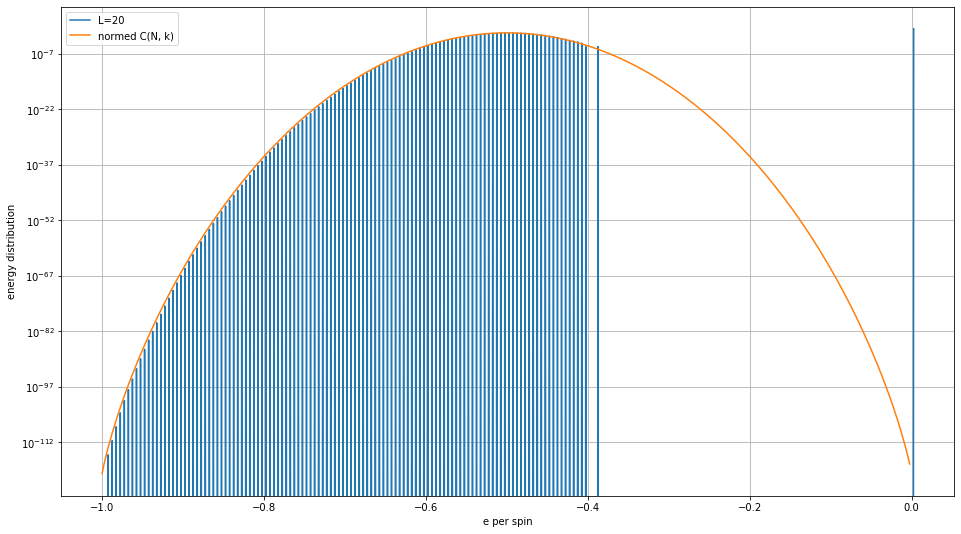

In [41]:
#beta = 1.69815
#beta = np.log(1 + np.sqrt(20)) #theoretical
L = 20
N = L * L
rho, Z = calc_rho(0, S)
plt.figure(figsize=(16, 9))
plt.plot([E / N for E in rho], [r for E, r in rho.items()], label="L={}".format(L))
x = [k for k in range(0, N)]
Z = sum([C(N, k) for k in x])
plt.plot([k / N - 1 for k in x], [C(N, k) / Z for k in x], label="normed C(N, k)")
plt.grid()
plt.yscale('log')
#plt.ylim([10**-17, 1])
#plt.title("beta is {}".format(beta))
plt.ylabel("energy distribution")
plt.xlabel("e per spin")
plt.legend()
plt.show()

In [17]:
#calc e_o and e_d
E_c = -1.25 * N
E_o = 0
s_o = 0
E_d = 0
s_d = 0
for E, r in rho.items():
    if E < E_c:
        E_o += r * E
        s_o += r
    else:
        E_d += r * E
        s_d += r
E_o /= s_o
E_o /= N
E_d /= s_d
E_d /= N
r_c = s_o / s_d
X = s_d - 1/21
E_o, E_d, r_c, X

(-1.8205720609390559,
 -0.6262458131023939,
 32.034847866827725,
 -0.017347983437633305)

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  


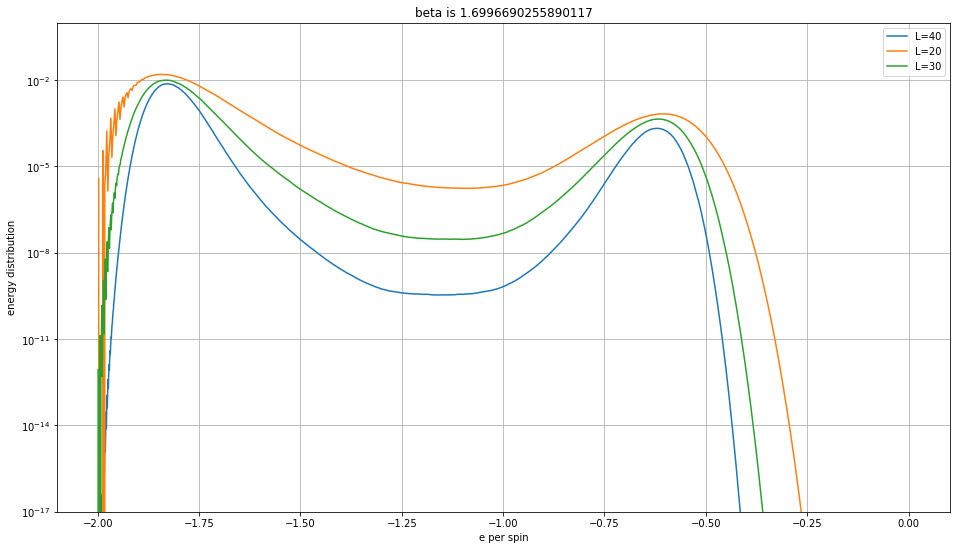

In [18]:
plt.figure(figsize=(16, 9))
for name in ["./datasets/xorworv2_L40_R524288_run0X.txt", "./datasets/xorworv2_L20_R524288_run1X.txt", "./datasets/xorworv2_L30_R524288_run2X.txt"]:
    culling_factor = od()
    with open(name) as f:
        for line in f:
            E, c = map(float, line.split())
            culling_factor[E] = c
    L = int(name.split("_L")[1].split("_R")[0])
    R = int(name.split("_R")[1].split("_run")[0])
    
    S = get_entropy_from_culling_factor(culling_factor) 
    beta = np.log(1 + np.sqrt(20)) #theoretical
    N = L * L
    rho, Z = calc_rho(beta, S)
    plt.plot([E / N for E in rho], [r for E, r in rho.items()], label="L={}".format(L))
    

plt.grid()
plt.yscale('log')
plt.ylim([10**-17, 1])
plt.title("beta is {}".format(beta))
plt.ylabel("energy distribution")
plt.xlabel("e per spin")
plt.legend()
plt.show()